In [12]:
### Two Game of Life implementations that I stole!



import numpy as np

def life_step_1(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_step_2(X):
    """Game of life step using scipy tools"""
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))
    
life_step = life_step_1

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
### Animating the Game of Life using JSAnimation and Ipython


# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation

def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):
    """Produce a Game of Life Animation
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    return display_animation(anim, default_mode=mode)


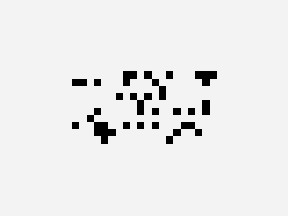
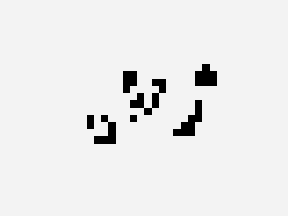
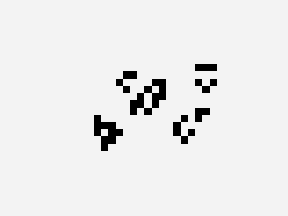
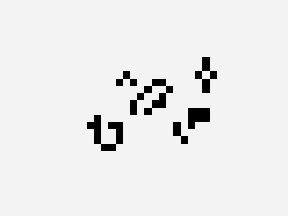
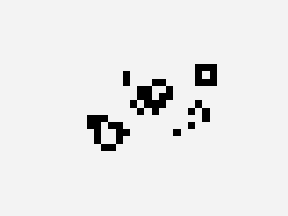
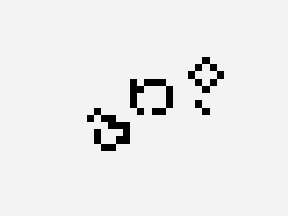
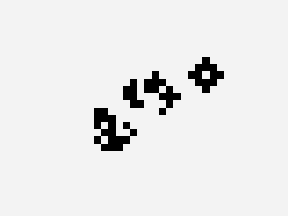
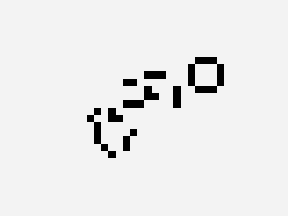
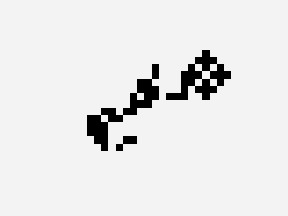
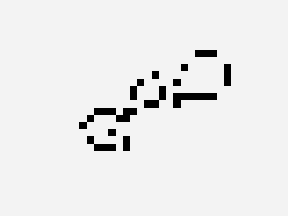
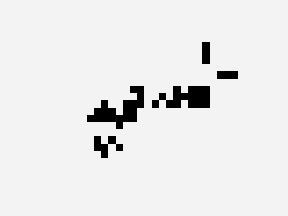
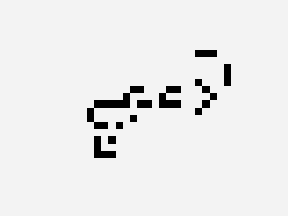
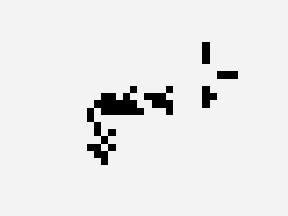
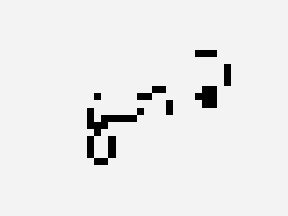
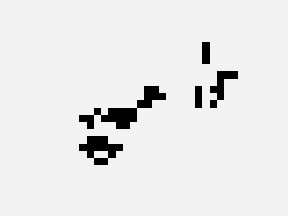
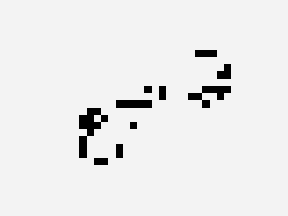
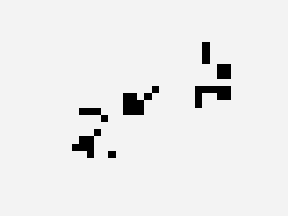
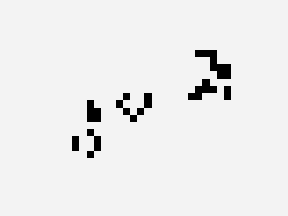
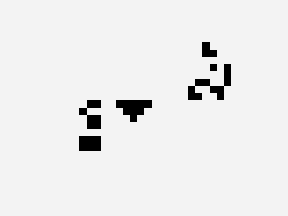
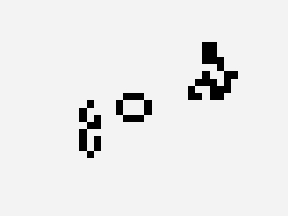
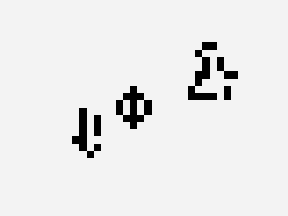
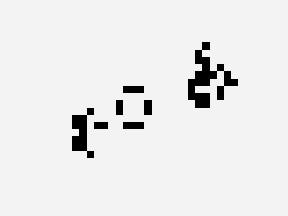
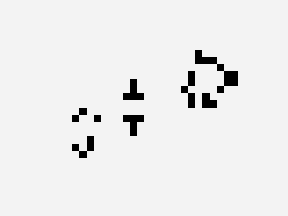
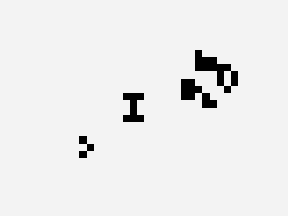
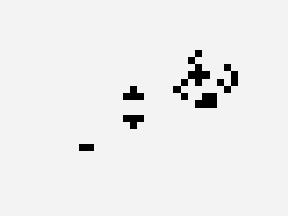
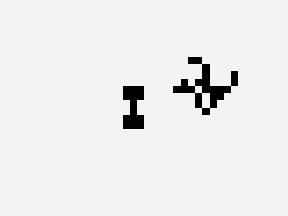
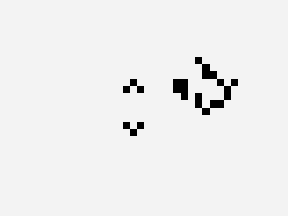
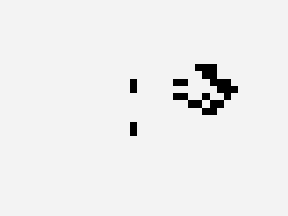
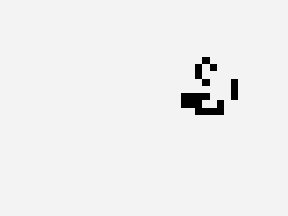
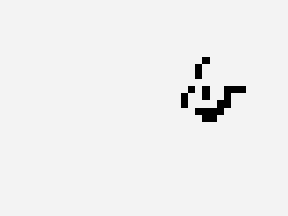
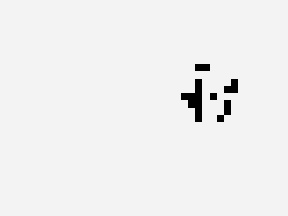
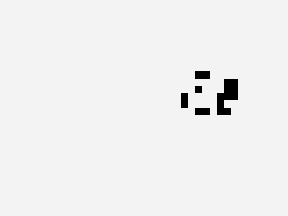
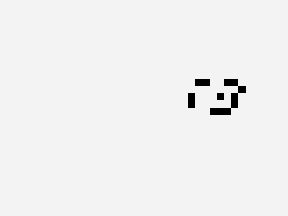
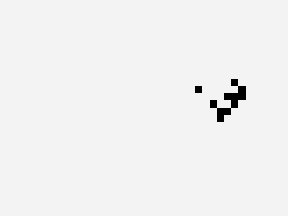
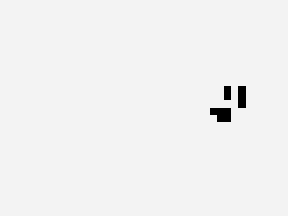
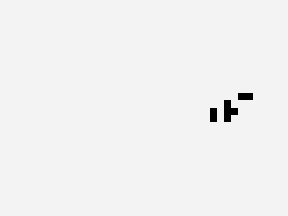
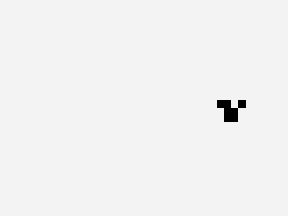
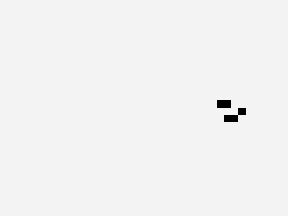
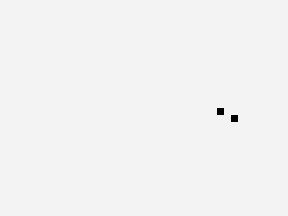
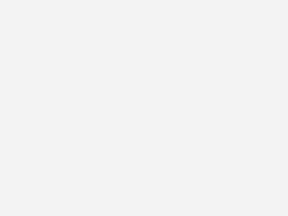

In [4]:
np.random.seed(0)
X = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))
X[10:20, 10:30] = (r > 0.75)
life_animation(X, dpi=10, frames=40, mode='once')


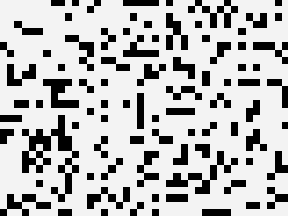
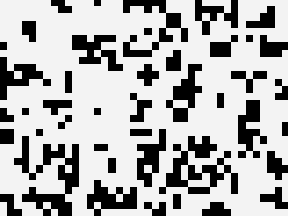
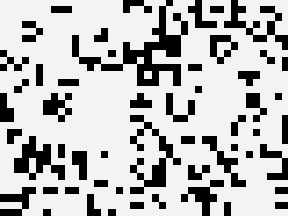
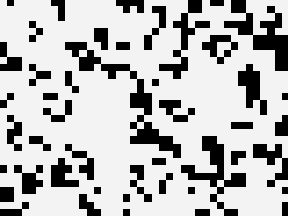
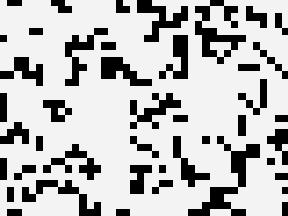
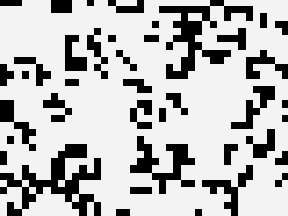
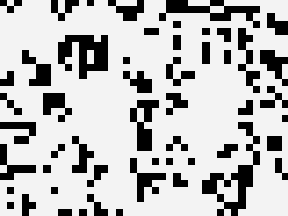
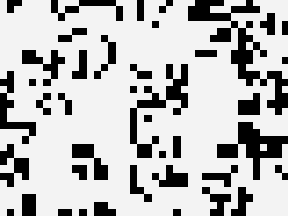
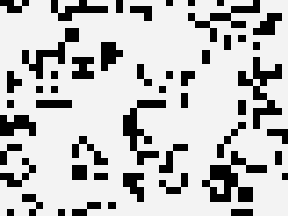
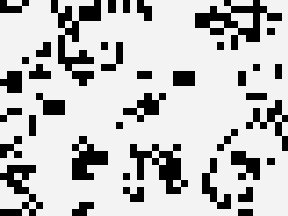
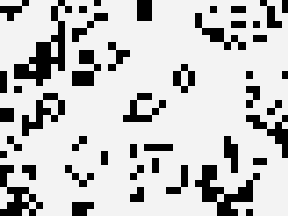
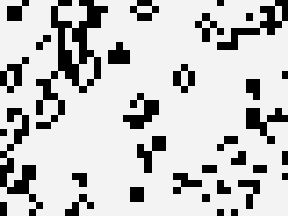
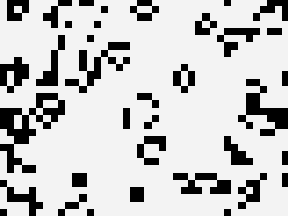
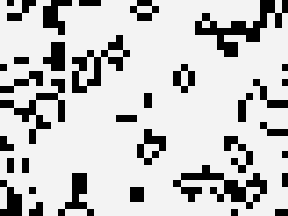
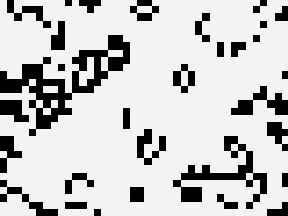
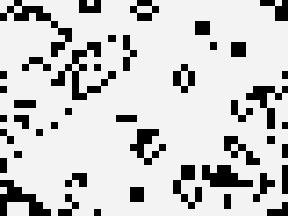
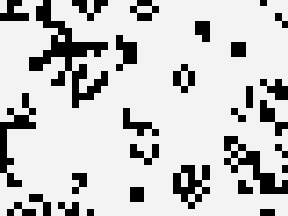
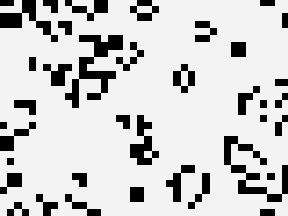
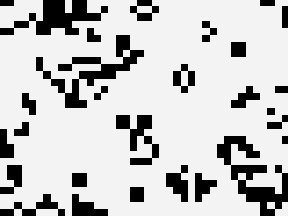
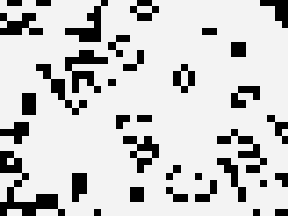
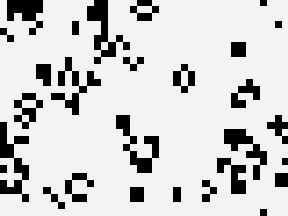
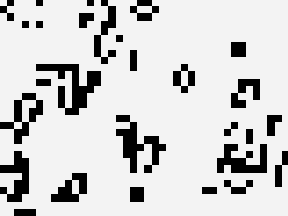
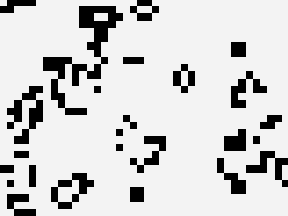
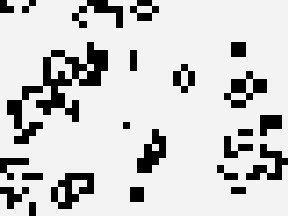
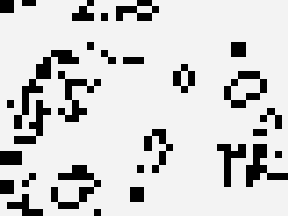
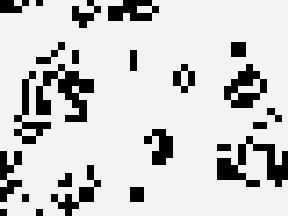
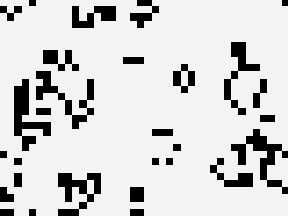
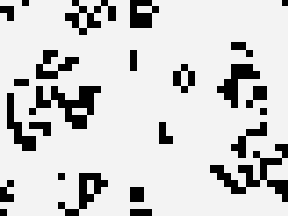
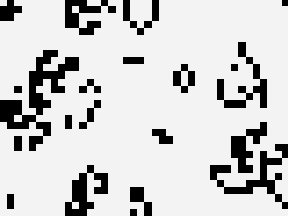
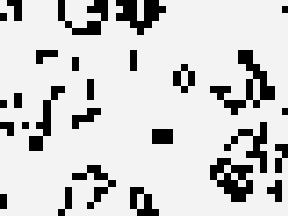
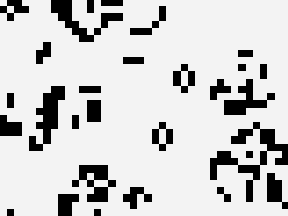
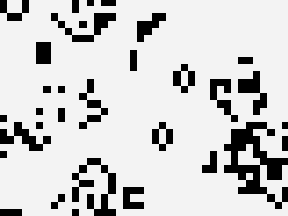
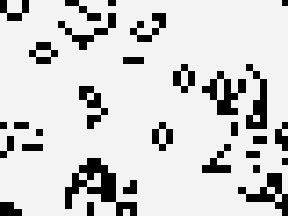
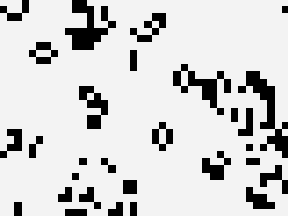
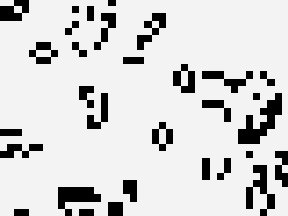
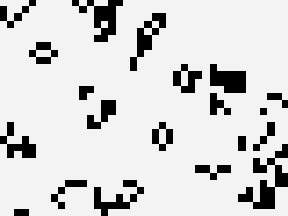
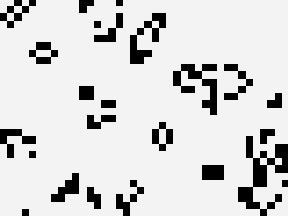
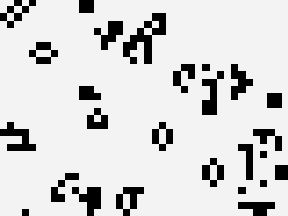
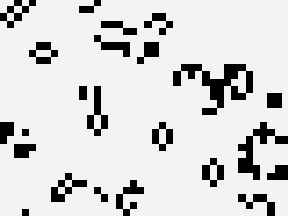
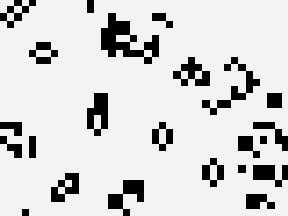

In [7]:
np.random.seed(0)
X2 = np.zeros((30, 40), dtype=bool)
r1 = np.random.random((30, 40))
X2 = (r1 > 0.75)
life_animation(X2, dpi=10, frames=40, mode='once')

In [24]:
## Another game of life implementation I stole!!


A = np.array([[0,0,0,0,0,0],
                  [0,0,0,1,0,0],
                  [0,1,0,1,0,0],
                  [0,0,1,1,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0]])

#Z = np.zeros((6,6),dtype = int)

def compute_neigbours(Z):
    shape = len(Z), len(Z[0])
    N  = [[0,]*(shape[0])  for i in range(shape[1])]
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

def iterate(Z):
    N = compute_neighbours(Z)
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                 Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                 Z[x][y] = 1
    return Z

iterate(Z)



NameError: global name 'compute_neighbours' is not defined

In [1]:
#### Using opencv...

import cv2
tree = cv2.imread("tree.jpg")
print tree

[[[251 218 192]
  [251 218 192]
  [251 218 192]
  ..., 
  [198 143 104]
  [198 143 104]
  [198 143 104]]

 [[251 218 192]
  [251 218 192]
  [251 218 192]
  ..., 
  [198 143 104]
  [198 143 104]
  [198 143 104]]

 [[251 218 192]
  [251 218 192]
  [251 218 192]
  ..., 
  [199 144 105]
  [199 144 105]
  [199 144 105]]

 ..., 
 [[  0  51  42]
  [ 17  64  56]
  [ 39  75  69]
  ..., 
  [ 13  81  70]
  [ 21  89  78]
  [ 36 104  93]]

 [[  0  54  44]
  [ 15  66  58]
  [ 40  78  72]
  ..., 
  [ 27 103  91]
  [ 29 105  93]
  [ 41 117 105]]

 [[ 13  73  63]
  [ 23  74  66]
  [ 32  70  64]
  ..., 
  [ 20  96  84]
  [ 16  92  80]
  [ 24 100  88]]]


In [5]:
cv2.imshow('tree',tree)

In [15]:
tree.shape

(640, 480, 3)

In [6]:
cv2.destroyAllWindows()

In [13]:
### A really basic go at using game of life to bend an image

tree_of_life = np.zeros((100, 100), dtype=bool)
tree_of_life = (tree[100:500,100:500]>130)

for i in range(100):
    tree_of_life = life_step(tree_of_life)




In [14]:
tree2 = tree
tree2[tree_of_life] = tree[tree_of_life] + 2

/Users/Home/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 640 but corresponding boolean dimension is 400
  from ipykernel import kernelapp as app


In [18]:
cv2.imshow('tree',tree2)
cv2.destroyAllWindows()

In [20]:
#print tree[1:5,1:5]
#print tree[1:5,1:5].mean()
test_tree = (tree[1:5,1:5]>tree[1:5,1:5].mean())
print test_tree[1]
print life_step(test_tree[0])

[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
